### pandas 라이브러리와 탐색적 데이터 분석 과정 익히기

> 다양한 데이터 분석 케이스를 통해 데이터 분석과 pandas 라이브러리 활용에 대해 익히보기로 합니다.

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="4em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석</font><br>

### 전체 판매 프로세스
1. 해당 쇼핑몰에 중소업체가 계약을 맺고
2. 중소업체가 해당 쇼핑몰에 직접 상품을 올리고
2. 고객이 구매하면, 중소업체가 Olist가 제공하는 물류 파트너를 활용해서 배송을 하고,
3. 고객이 상품을 받으면, 고객에게 이메일 survey 가 전송되고,
4. 고객이 이메일 survey 에 별점과 커멘트를 남겨서 제출하게 됨
    
### 데이터 출처
- 브라질에서 가장 큰 백화점의 이커머스 쇼핑몰 (https://olist.com/)
  - 2016년도부터 2018년도 9월까지의 100k 개의 구매 데이터 정보
  - 구매 상태, 가격, 지불수단, 물류 관련, 리뷰관련, 상품 정보, 구매자 지역 관련 정보

### 주요 질문(탐색하고자 하는 질문 리스트)
- 얼마나 많은 고객이 있는가?
- 고객은 어디에 주로 사는가?
- 고객은 주로 어떤 지불방법을 사용하는가?
- **평균 거래액은 얼마일까?**
- **일별, 주별, 월별 판매 트렌드는?**
- 어떤 카테고리가 가장 많은 상품이 팔렸을까?
- 평균 배송 시간은?
</div>

### 기존의 사전 작업

In [1]:
import pandas as pd
PATH = "00_data/"

In [2]:
products = pd.read_csv(PATH + "olist_products_dataset.csv", encoding='utf-8-sig')
customers = pd.read_csv(PATH + "olist_customers_dataset.csv", encoding='utf-8-sig')
geolocation = pd.read_csv(PATH + "olist_geolocation_dataset.csv", encoding='utf-8-sig')
order_items = pd.read_csv(PATH + "olist_order_items_dataset.csv", encoding='utf-8-sig')
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
reviews = pd.read_csv(PATH + "olist_order_reviews_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
sellers = pd.read_csv(PATH + "olist_sellers_dataset.csv", encoding='utf-8-sig')
category_name = pd.read_csv(PATH + "product_category_name_translation.csv", encoding='utf-8-sig')

#### orders의 null 인 데이터 삭제하고, payments 와 합치기

In [3]:
orders = orders.dropna()
merged_order = pd.merge(orders, payments, on='order_id')

In [4]:
merged_order_payment_date = merged_order[['order_purchase_timestamp', 'payment_value']].copy()

In [5]:
merged_order_payment_date

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,18.12
1,2017-10-02 10:56:33,2.00
2,2017-10-02 10:56:33,18.59
3,2018-07-24 20:41:37,141.46
4,2018-08-08 08:38:49,179.12
...,...,...
100734,2017-03-09 09:54:05,85.08
100735,2018-02-06 12:58:58,195.00
100736,2017-08-27 14:46:43,271.01
100737,2018-01-08 21:28:27,441.16


### 1.5. 월별 거래건수 확인하기

In [6]:
# order_purchase_timestamp 의 날짜 데이터를 기반으로 월별 계산을 해야 하므로 datetime 타입으로 변환
merged_order_payment_date['order_purchase_timestamp'] = pd.to_datetime(merged_order_payment_date['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise') 
merged_order_payment_date = merged_order_payment_date.set_index('order_purchase_timestamp')

merged_order_month_count = merged_order_payment_date.groupby(pd.Grouper(freq='M')).count() # key 는 기본이 index 임
merged_order_month_count.head()

,payment_value
order_purchase_timestamp,
2016-10-31,287
2016-11-30,0
2016-12-31,1
2017-01-31,797
2017-02-28,1737


In [7]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [8]:
merged_order_month_count.iplot(kind='bar', theme='white')

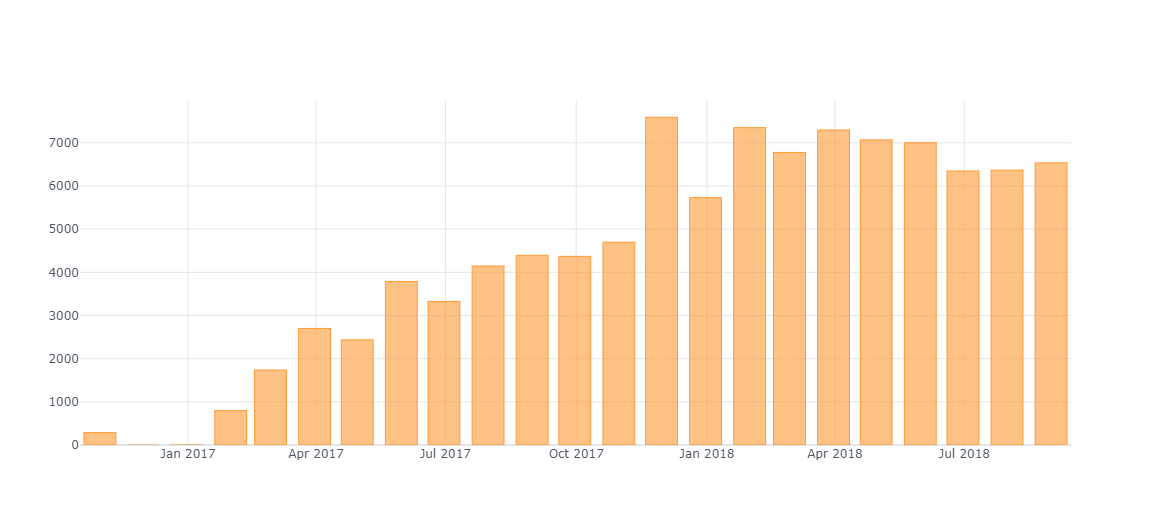

### 1.6. 일별 거래액 확인하기

In [9]:
merged_order_date_sum = merged_order_payment_date.groupby(pd.Grouper(freq='D')).sum() # key 는 기본이 index 임
merged_order_date_sum.head()

,payment_value
order_purchase_timestamp,
2016-10-03,595.14
2016-10-04,9821.42
2016-10-05,7209.50
2016-10-06,6733.52
2016-10-07,7096.69


In [10]:
merged_order_date_sum.iplot(kind='line', theme='white')

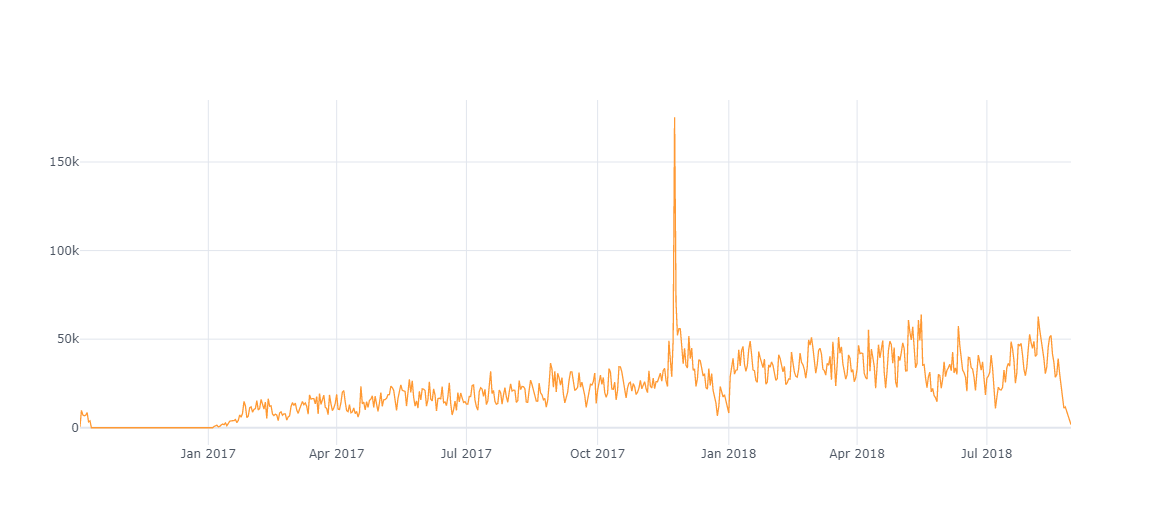

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="4em" style="font-weight:bold;color:#3f8dbf;">연습문제</font><br>
일별 거래건수 분석하기<br>
</div>

In [46]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100739 non-null  object 
 1   customer_id                    100739 non-null  object 
 2   order_status                   100739 non-null  object 
 3   order_purchase_timestamp       100739 non-null  object 
 4   order_approved_at              100739 non-null  object 
 5   order_delivered_carrier_date   100739 non-null  object 
 6   order_delivered_customer_date  100739 non-null  object 
 7   order_estimated_delivery_date  100739 non-null  object 
 8   payment_sequential             100739 non-null  int64  
 9   payment_type                   100739 non-null  object 
 10  payment_installments           100739 non-null  int64  
 11  payment_value                  100739 non-null  float64
dtypes: float64(1), int64(2), objec

In [31]:
merged_order_date = merged_order[['order_purchase_timestamp', 'payment_value']].copy()
merged_order_date['order_purchase_timestamp'] = pd.to_datetime(merged_order_date['order_purchase_timestamp'], format = "%Y-%m-%d %H:%M:%S", errors = 'raise')
merged_order_date = merged_order_date.set_index('order_purchase_timestamp')
merged_order_date_day_counts = merged_order_date.groupby(pd.Grouper(freq = 'D')).count()
merged_order_date_day_counts.iplot(kind = 'line', theme = 'white')

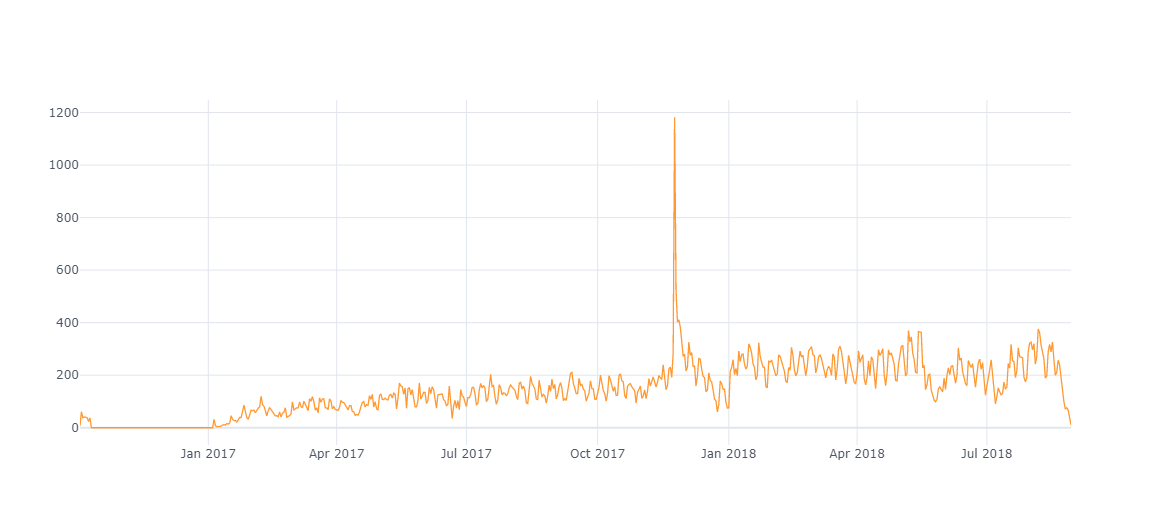

In [32]:
merged_order_date_day_counts

,payment_value
order_purchase_timestamp,
2016-10-03,8
2016-10-04,61
2016-10-05,38
2016-10-06,41
2016-10-07,40
...,...
2018-08-25,71
2018-08-26,76
2018-08-27,68


### 1.7. 시간대별 분석

In [27]:
merged_order_payment_date = merged_order[['order_purchase_timestamp', 'payment_value']].copy()
merged_order_payment_date.head()

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,18.12
1,2017-10-02 10:56:33,2.00
2,2017-10-02 10:56:33,18.59
3,2018-07-24 20:41:37,141.46
4,2018-08-08 08:38:49,179.12


<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="4em" style="font-weight:bold;color:#3f8dbf;"> 팁: pandas 버전별로 지원 기능, 변수/함수명이 변경되는 경우가 있음 </font><br>
- dir() 함수를 통해 지원되는 기능/변수/함수명을 대략적으로 파악할 수 있음 <br>
</div>

In [29]:
# order_purchase_timestamp 의 날짜 데이터를 기반으로 월별 계산을 해야 하므로 datetime 타입으로 변환
merged_order_payment_date['order_purchase_timestamp'] = pd.to_datetime(merged_order_payment_date['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise') 

merged_order_payment_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  100739 non-null  datetime64[ns]
 1   payment_value             100739 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


In [30]:
dir(merged_order_payment_date['order_purchase_timestamp'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [33]:
merged_order_payment_date['order_purchase_timestamp'].dt.quarter

0         4
1         4
2         4
3         3
4         3
         ..
100734    1
100735    1
100736    3
100737    1
100738    1
Name: order_purchase_timestamp, Length: 100739, dtype: int64

### 사전 설정
- datetime 필드는 dt.시간 별로 필요한 부분만 추출 가능

In [34]:
merged_order_payment_date['year'] = merged_order_payment_date['order_purchase_timestamp'].dt.year
merged_order_payment_date['monthday'] = merged_order_payment_date['order_purchase_timestamp'].dt.day
merged_order_payment_date['weekday'] = merged_order_payment_date['order_purchase_timestamp'].dt.weekday
merged_order_payment_date['month'] = merged_order_payment_date['order_purchase_timestamp'].dt.month
merged_order_payment_date['hour'] = merged_order_payment_date['order_purchase_timestamp'].dt.hour
merged_order_payment_date['quarter'] = merged_order_payment_date['order_purchase_timestamp'].dt.quarter
merged_order_payment_date['minute'] = merged_order_payment_date['order_purchase_timestamp'].dt.minute

In [35]:
merged_order_payment_date.head()

,order_purchase_timestamp,payment_value,year,monthday,weekday,month,hour,quarter,minute
0,2017-10-02 10:56:33,18.12,2017,2,0,10,10,4,56
1,2017-10-02 10:56:33,2.00,2017,2,0,10,10,4,56
2,2017-10-02 10:56:33,18.59,2017,2,0,10,10,4,56
3,2018-07-24 20:41:37,141.46,2018,24,1,7,20,3,41
4,2018-08-08 08:38:49,179.12,2018,8,2,8,8,3,38


### 1.8. 연도별 분석

In [37]:
merged_order_payment_year = merged_order_payment_date[['year', 'payment_value']].copy()

In [38]:
merged_order_payment_year

,year,payment_value
0,2017,18.12
1,2017,2.00
2,2017,18.59
3,2018,141.46
4,2018,179.12
...,...,...
100734,2017,85.08
100735,2018,195.00
100736,2017,271.01
100737,2018,441.16


In [39]:
merged_order_payment_year = merged_order_payment_year.groupby('year').sum()
merged_order_payment_year.head()

,payment_value
year,
2016,47290.82
2017,6920422.83
2018,8451969.20


In [40]:
merged_order_payment_year.iplot(kind='bar', theme='white')

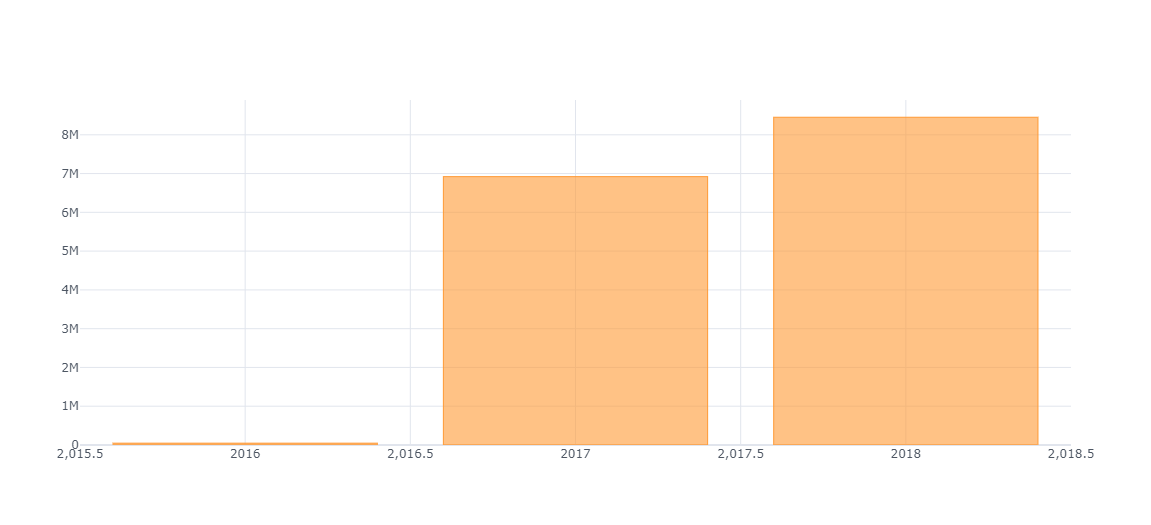

#### 은근히 x tick 제어가 필요할 때가 꽤 있음

In [41]:
layout = {
    'xaxis': {
        'showticklabels':True,
        'tickvals':[2016, 2017, 2018]
    }
}
merged_order_payment_year.iplot(kind='bar', theme='white', layout=layout)

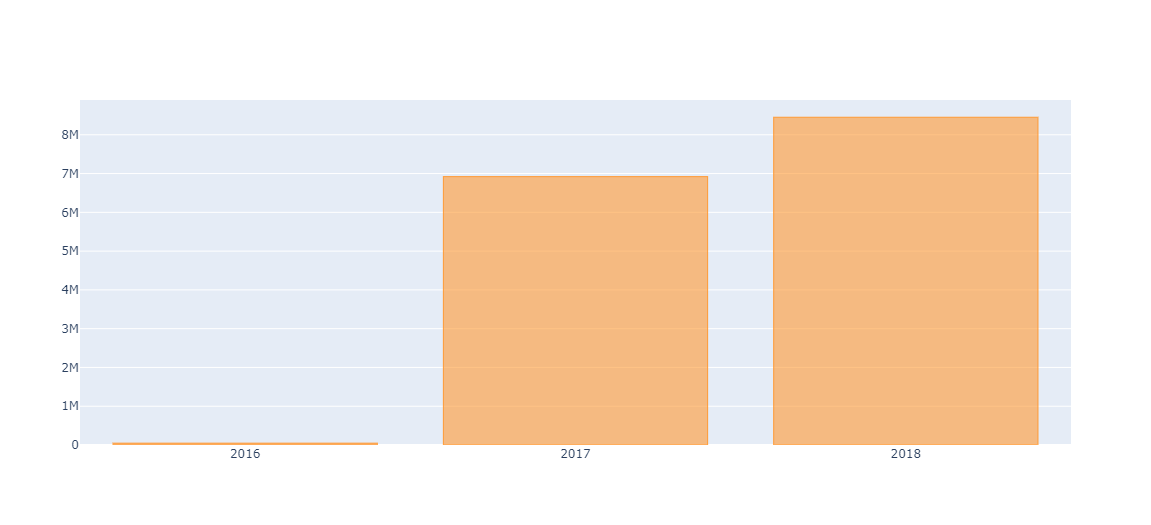

### 1.9. 요일별 분석
- weekday : (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)

In [62]:
merged_order_payment_weekday = merged_order_payment_date[['weekday', 'payment_value']].copy()

In [63]:
merged_order_payment_weekday = merged_order_payment_weekday.groupby('weekday').sum()
merged_order_payment_weekday.head()

,payment_value
weekday,
0,2530671.56
1,2473930.77
2,2396215.34
3,2283849.51
4,2222421.36


In [64]:
merged_order_payment_weekday = merged_order_payment_weekday.reset_index()

In [65]:
merged_order_payment_weekday.head()

,weekday,payment_value
0,0,2530671.56
1,1,2473930.77
2,2,2396215.34
3,3,2283849.51
4,4,2222421.36


#### apply() 함수 활용해서 컬럼값 변경하기
- index 를 column 으로 변경하고 (reset_index()), column 값을 순서에 맞춰서 변경 후, index로 재설정(set_index())

In [66]:
def func(row):
    if row['weekday'] == 6:
        row['weekday'] = 'Sun'
    elif row['weekday'] == 0:
        row['weekday'] = 'Mon'
    elif row['weekday'] == 1:
        row['weekday'] = 'Tue'
    elif row['weekday'] == 2:
        row['weekday'] = 'Wed'
    elif row['weekday'] == 3:
        row['weekday'] = 'Thu'
    elif row['weekday'] == 4:
        row['weekday'] = 'Fri'
    elif row['weekday'] == 5:
        row['weekday'] = 'Sat'
        
    return row

In [67]:
merged_order_payment_weekday = merged_order_payment_weekday.apply(func, axis=1)
merged_order_payment_weekday

,weekday,payment_value
0,Mon,2530671.56
1,Tue,2473930.77
2,Wed,2396215.34
3,Thu,2283849.51
4,Fri,2222421.36
5,Sat,1704949.69
6,Sun,1807644.62


In [68]:
merged_order_payment_weekday = merged_order_payment_weekday.set_index('weekday')
merged_order_payment_weekday

,payment_value
weekday,
Mon,2530671.56
Tue,2473930.77
Wed,2396215.34
Thu,2283849.51
Fri,2222421.36
Sat,1704949.69
Sun,1807644.62


In [69]:
merged_order_payment_weekday.iplot(kind='bar', theme='white')

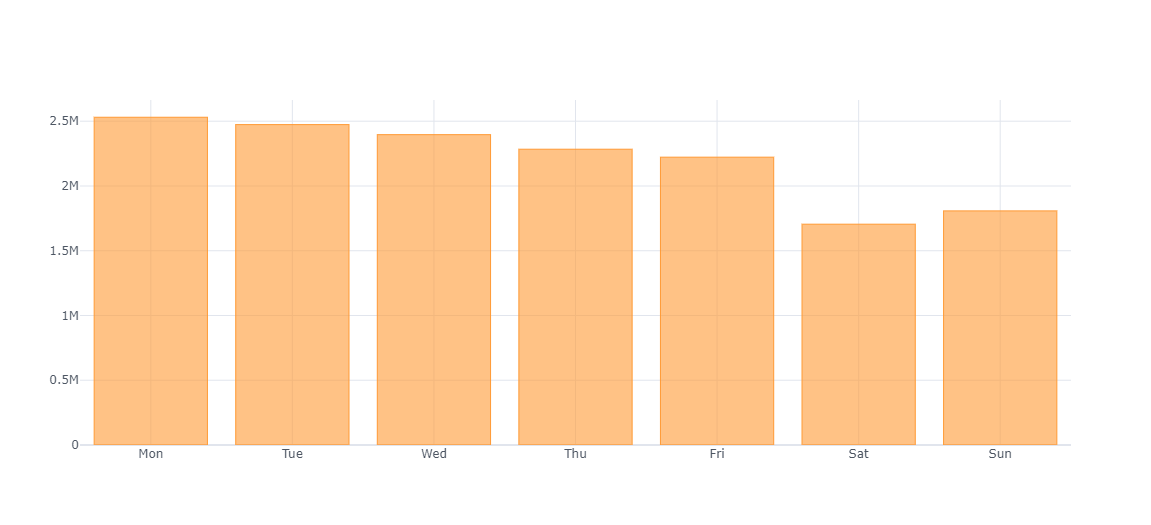

### 1.10. 계절별(quarter별) 분석
- quarter : (1:1분기, 2:2분기, 3:3분기, 4:4분기) 

> 물론 현지 사정에 따라 계절 상황을 알면 도움이 됨

In [70]:
merged_order_payment_quarter = merged_order_payment_date[['quarter', 'payment_value']].copy()

In [71]:
merged_order_payment_quarter = merged_order_payment_quarter.groupby('quarter').sum()
merged_order_payment_quarter.head()

,payment_value
quarter,
1,3977098.94
2,4721382.50
3,3926177.93
4,2795023.48


In [72]:
merged_order_payment_quarter = merged_order_payment_quarter.reset_index()

In [73]:
def func(row):
    if row['quarter'] == 1:
        row['quarter'] = '1Q'
    elif row['quarter'] == 2:
        row['quarter'] = '2Q'
    elif row['quarter'] == 3:
        row['quarter'] = '3Q'
    elif row['quarter'] == 4:
        row['quarter'] = '4Q'
        
    return row

In [74]:
merged_order_payment_quarter = merged_order_payment_quarter.apply(func, axis=1)

In [75]:
merged_order_payment_quarter = merged_order_payment_quarter.set_index('quarter')

In [76]:
merged_order_payment_quarter.iplot(kind='bar', theme='white')

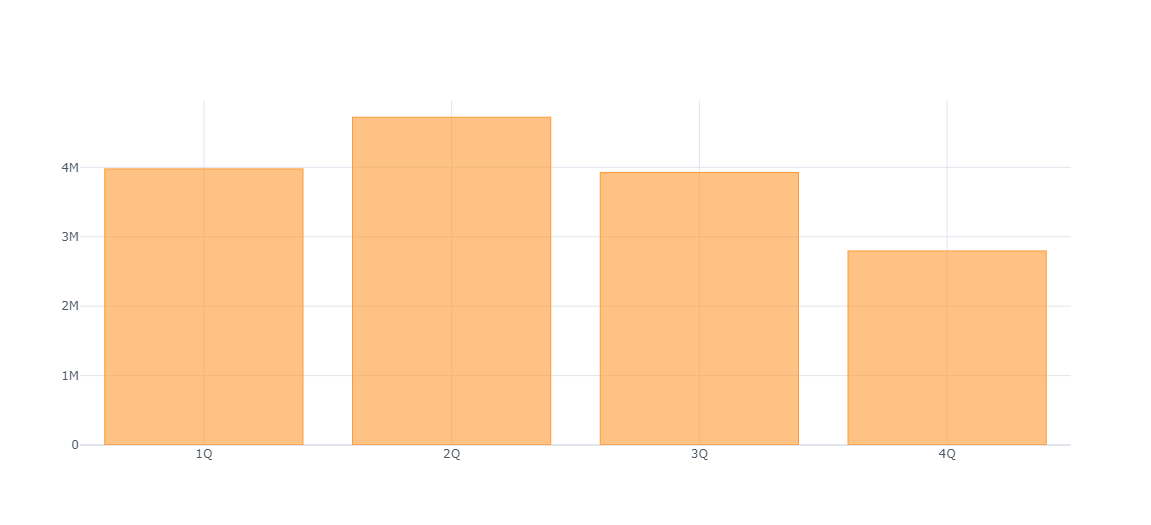

### 1.11. 시간대별 분석

> 분명히 시간대별 구매율이 높은 구간이 있을 것임

In [77]:
merged_order_payment_hour = merged_order_payment_date[['hour', 'payment_value']].copy()

In [78]:
merged_order_payment_hour = merged_order_payment_hour.groupby('hour').sum()
merged_order_payment_hour.head()

,payment_value
hour,
0,360158.45
1,171441.04
2,64572.21
3,37551.29
4,28209.97


In [79]:
merged_order_payment_hour.iplot(kind='bar', theme='white')

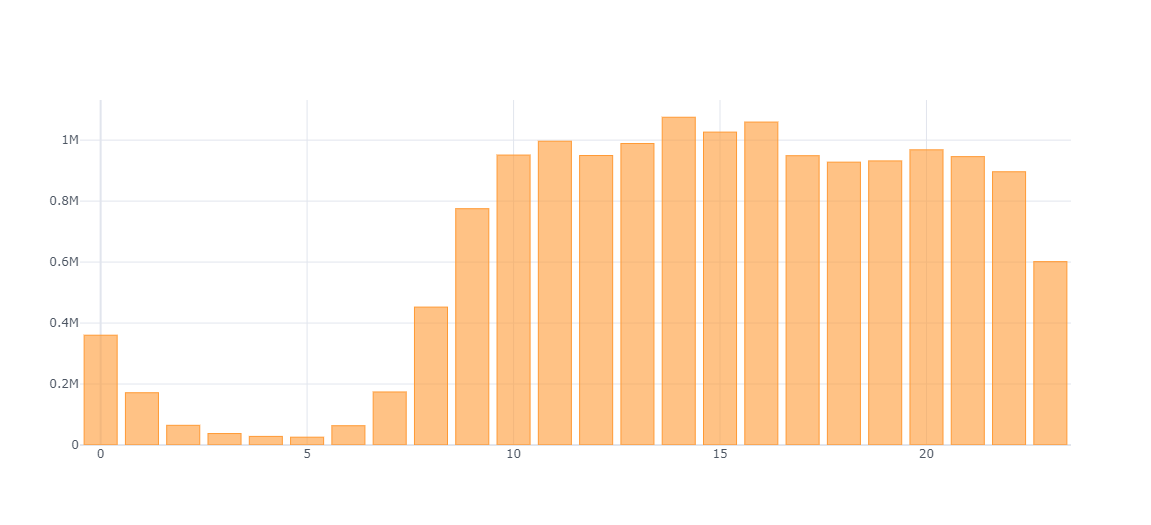

#### 은근히 x tick 을 제어하고 싶을 때가 있습니다.

In [80]:
layout = {
    'xaxis': {
        'showticklabels':True,
        'dtick': 1
    }
}
merged_order_payment_hour.iplot(kind='bar', theme='white', layout=layout)

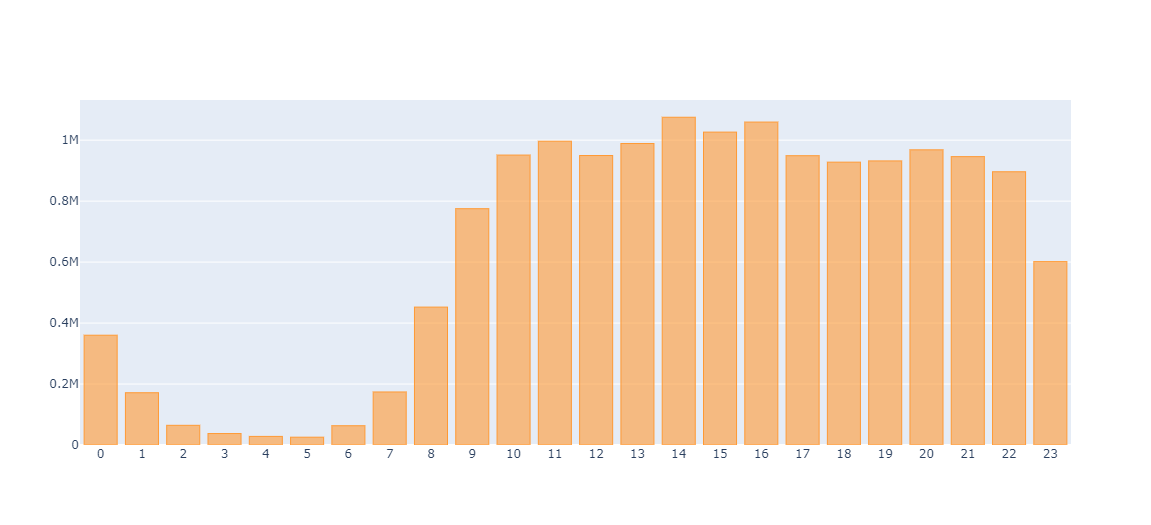

### 1.12. 분(minutes)별 분석

In [82]:
merged_order_payment_minute = merged_order_payment_date[['minute', 'payment_value']].copy()

In [83]:
merged_order_payment_minute = merged_order_payment_minute.groupby('minute').sum()
merged_order_payment_minute.head()

,payment_value
minute,
0,253410.99
1,247286.12
2,220971.41
3,245626.28
4,265087.98


In [84]:
merged_order_payment_minute.iplot(kind='bar', theme='white')

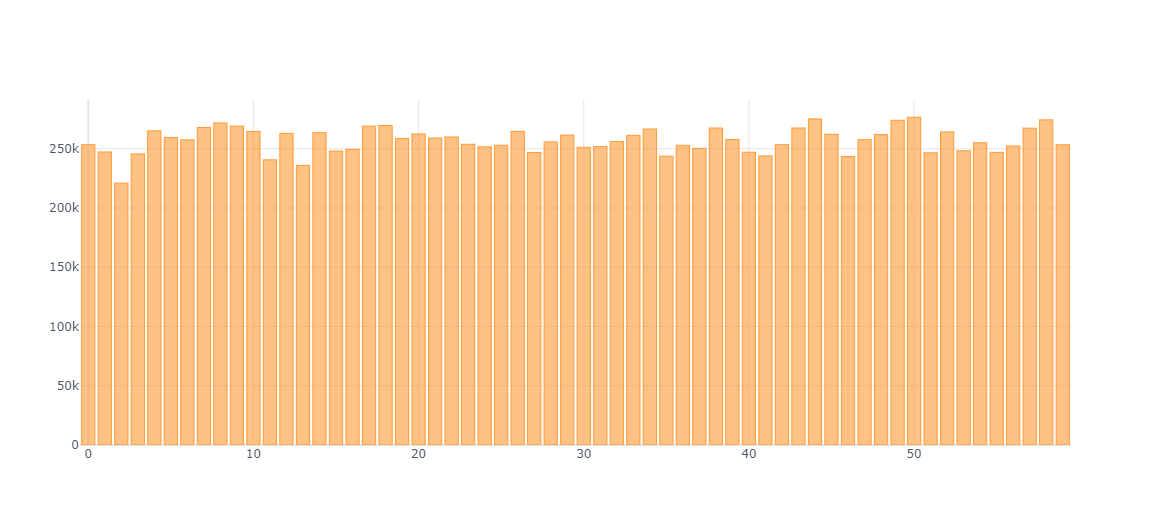

In [85]:
layout = {
    'xaxis': {
        'showticklabels':True,
        'dtick': 1
    }
}
merged_order_payment_minute.iplot(kind='bar', theme='white', layout=layout)

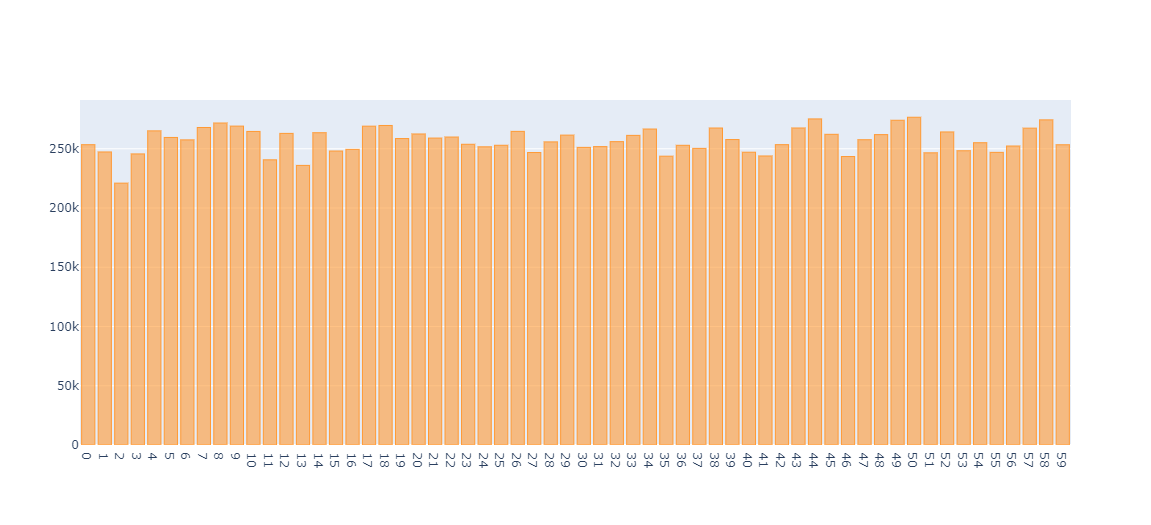

### 1.13. 요일/시간간 거래액 상관관계 알아보기 
- 상관관계 분석을 위해 사용되는 그래프: heatmap

In [104]:
import pandas as pd
PATH = "00_data/"
products = pd.read_csv(PATH + "olist_products_dataset.csv", encoding='utf-8-sig')
customers = pd.read_csv(PATH + "olist_customers_dataset.csv", encoding='utf-8-sig')
geolocation = pd.read_csv(PATH + "olist_geolocation_dataset.csv", encoding='utf-8-sig')
order_items = pd.read_csv(PATH + "olist_order_items_dataset.csv", encoding='utf-8-sig')
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
reviews = pd.read_csv(PATH + "olist_order_reviews_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
sellers = pd.read_csv(PATH + "olist_sellers_dataset.csv", encoding='utf-8-sig')
category_name = pd.read_csv(PATH + "product_category_name_translation.csv", encoding='utf-8-sig')
orders = orders.dropna()
merged_order = pd.merge(orders, payments, on='order_id')
merged_order_payment_date = merged_order[['order_purchase_timestamp', 'payment_value']].copy()
merged_order_payment_date['order_purchase_timestamp'] = pd.to_datetime(merged_order_payment_date['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise') 
merged_order_payment_date['year'] = merged_order_payment_date['order_purchase_timestamp'].dt.year
merged_order_payment_date['monthday'] = merged_order_payment_date['order_purchase_timestamp'].dt.day
merged_order_payment_date['weekday'] = merged_order_payment_date['order_purchase_timestamp'].dt.weekday
merged_order_payment_date['month'] = merged_order_payment_date['order_purchase_timestamp'].dt.month
merged_order_payment_date['hour'] = merged_order_payment_date['order_purchase_timestamp'].dt.hour
merged_order_payment_date['quarter'] = merged_order_payment_date['order_purchase_timestamp'].dt.quarter
merged_order_payment_date['minute'] = merged_order_payment_date['order_purchase_timestamp'].dt.minute

In [105]:
merged_order_payment_date.head()

,order_purchase_timestamp,payment_value,year,monthday,weekday,month,hour,quarter,minute
0,2017-10-02 10:56:33,18.12,2017,2,0,10,10,4,56
1,2017-10-02 10:56:33,2.00,2017,2,0,10,10,4,56
2,2017-10-02 10:56:33,18.59,2017,2,0,10,10,4,56
3,2018-07-24 20:41:37,141.46,2018,24,1,7,20,3,41
4,2018-08-08 08:38:49,179.12,2018,8,2,8,8,3,38


In [106]:
merged_order_payment_hour_weekday = merged_order_payment_date[['weekday', 'hour', 'payment_value']].copy()

In [107]:
merged_order_payment_hour_weekday

,weekday,hour,payment_value
0,0,10,18.12
1,0,10,2.00
2,0,10,18.59
3,1,20,141.46
4,2,8,179.12
...,...,...,...
100734,3,9,85.08
100735,1,12,195.00
100736,6,14,271.01
100737,0,21,441.16


### weekday 를 요일명으로 변경하기 

- 멀티 인덱스: 하나 이상의 컬럼을 인덱스로 설정할 수 있음

In [108]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.groupby(['weekday','hour']).sum()

In [109]:
merged_order_payment_hour_weekday

payment_value
weekday hour               
0       0          46807.42
        1          17734.77
        2           7462.56
        3           6442.62
        4           2138.02
...                     ...
6       19        140127.39
        20        150543.96
        21        135431.31
        22        127866.74
        23         82991.95

[168 rows x 1 columns]

- 멀티 인덱스에서 특정 인덱스값 가져오기

In [110]:
merged_order_payment_hour_weekday.index[1][0] # 리스트 안의 리스트일 때처럼 가리키면 됨

0

In [111]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.reset_index()

In [112]:
merged_order_payment_hour_weekday

,weekday,hour,payment_value
0,0,0,46807.42
1,0,1,17734.77
2,0,2,7462.56
3,0,3,6442.62
4,0,4,2138.02
...,...,...,...
163,6,19,140127.39
164,6,20,150543.96
165,6,21,135431.31
166,6,22,127866.74


- apply 함수 만들기

In [113]:
def func(row):
    if row['weekday'] == 6:
        row['weekday'] = 'Sun'
    elif row['weekday'] == 0:
        row['weekday'] = 'Mon'
    elif row['weekday'] == 1:
        row['weekday'] = 'Tue'
    elif row['weekday'] == 2:
        row['weekday'] = 'Wed'
    elif row['weekday'] == 3:
        row['weekday'] = 'Thu'
    elif row['weekday'] == 4:
        row['weekday'] = 'Fri'
    elif row['weekday'] == 5:
        row['weekday'] = 'Sat'
        
    return row

In [114]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.apply(func, axis=1)
merged_order_payment_hour_weekday

,weekday,hour,payment_value
0,Mon,0.0,46807.42
1,Mon,1.0,17734.77
2,Mon,2.0,7462.56
3,Mon,3.0,6442.62
4,Mon,4.0,2138.02
...,...,...,...
163,Sun,19.0,140127.39
164,Sun,20.0,150543.96
165,Sun,21.0,135431.31
166,Sun,22.0,127866.74


### 행 임의 이름 순서로 정렬하기
- 우선 해당 이름에 번호를 매겨 놓은 후, sort_values 로 번호를 기반으로 값으로 정렬함

```python
해당데이터프레임Series = pd.Categorical(시리즈데이터, categories=이름순서리스트, ordered=True)
```

In [115]:
merged_order_payment_hour_weekday['weekday'] = pd.Categorical(merged_order_payment_hour_weekday['weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)

### 행 값으로 정렬하기

```python
sort_values(by=[필드명])
```

In [116]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.sort_values(by=['weekday', 'hour'], ascending=True)

In [117]:
merged_order_payment_hour_weekday.head(40)

,weekday,hour,payment_value
144,Sun,0.0,38888.45
145,Sun,1.0,20137.20
146,Sun,2.0,11965.82
147,Sun,3.0,6326.13
148,Sun,4.0,3914.48
149,Sun,5.0,3447.12
150,Sun,6.0,3585.66
151,Sun,7.0,17573.93
152,Sun,8.0,34162.64
153,Sun,9.0,62017.80


In [118]:
merged_order_payment_hour_weekday.iplot(kind='heatmap', y='weekday', x='hour', z='payment_value', colorscale='Blues')

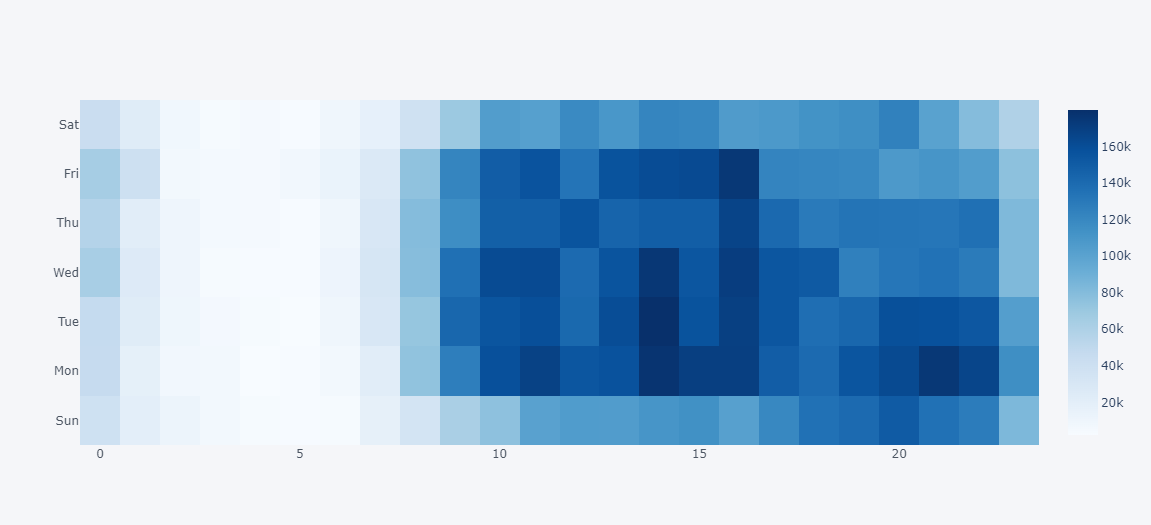

### x tick 제어

In [119]:
layout = {
    'title':  {
            "text": "<b>Heatmap of turnover over the hour by day</b>",
            "x": 0.5,
            "y": 0.87,
            "font": {
                "size": 16
            }
    },
    'xaxis': {
        'title': '<b>Hour</b>',
        'showticklabels':True,
        'dtick': 1
    },
    "yaxis": {
        "title": "<b>The day of the week</b>"
    },
    "template":'plotly_white'
}
merged_order_payment_hour_weekday.iplot(kind='heatmap', y='weekday', x='hour', z='payment_value', colorscale='Reds', layout=layout)


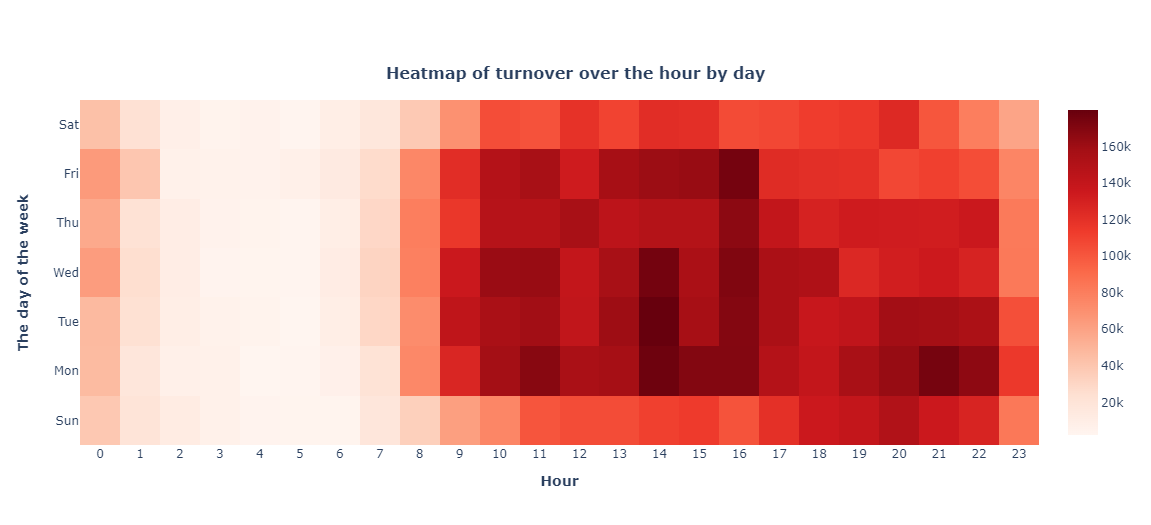